<a href="https://colab.research.google.com/github/jahanvi513/Pytorch/blob/main/Rice_Type_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
!pip install opendatasets --quiet
import opendatasets as od
od.download("https://www.kaggle.com/datasets/mssmartypants/rice-type-classification")

Skipping, found downloaded files in "./rice-type-classification" (use force=True to force download)


In [32]:
import torch
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import Dataset, DataLoader
from torchsummary import summary
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [33]:
data = pd.read_csv("/content/rice-type-classification/riceClassification.csv")
data.head()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


In [34]:
data.dropna(inplace = True)
data.drop({'id'}, axis=1, inplace = True)
print(data.shape)

(18185, 11)


In [35]:
data.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


In [36]:
original = data.copy()

for column in data.columns:
  data[column] = data[column]/data[column].abs().max()

data.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,0.444368,0.503404,0.775435,0.744658,0.424873,0.666610,0.741661,0.537029,0.844997,0.368316,1.0
1,0.281293,0.407681,0.622653,0.750489,0.273892,0.530370,0.804230,0.409661,0.919215,0.371471,1.0
2,0.298531,0.416421,0.630442,0.756341,0.284520,0.546380,0.856278,0.412994,0.959862,0.374747,1.0
3,0.300979,0.420463,0.629049,0.764024,0.286791,0.548616,0.883772,0.414262,0.961818,0.379222,1.0
4,0.361704,0.464626,0.682901,0.775033,0.345385,0.601418,0.867808,0.452954,0.966836,0.386007,1.0


In [37]:
x = np.array(data.iloc[:, :-1])
y = np.array(data.iloc[:, -1])

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3)
x_test, x_val, y_test, y_val = train_test_split(x_test,y_test, test_size = 0.5)

In [39]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(12729, 10)
(2728, 10)
(2728, 10)


In [40]:
class dataset(Dataset):
  def __init__(self, x, y):
    self.x = torch.tensor(x, dtype = torch.float32).to(device)
    self.y = torch.tensor(y, dtype = torch.float32).to(device)

  def __len__(self):
    return len(self.x)

  def __getitem__(self, index):
    return self.x[index], self.y[index]

In [41]:
training_data = dataset(x_train, y_train)
validation_data = dataset(x_val, y_val)
testing_data = dataset(x_test, y_test)

In [42]:
train_dataloader = DataLoader(training_data, batch_size = 8, shuffle=True)
validation_dataloader = DataLoader(validation_data, batch_size = 8, shuffle=True)
testing_dataloader = DataLoader(testing_data, batch_size = 8, shuffle=True)

In [43]:
for x, y in train_dataloader:
  print(x)
  print("======")
  print(y)
  break

tensor([[0.9759, 0.8864, 0.9572, 0.9037, 0.9281, 0.9879, 0.7372, 0.7868, 0.8644,
         0.5254],
        [0.8619, 0.8479, 0.8870, 0.9122, 0.8259, 0.9284, 0.6739, 0.7422, 0.8580,
         0.5423],
        [0.5808, 0.7522, 0.6748, 0.9461, 0.5512, 0.7621, 0.6913, 0.6229, 0.8209,
         0.6324],
        [0.7899, 0.8138, 0.8437, 0.9146, 0.7525, 0.8888, 0.6656, 0.7056, 0.8701,
         0.5473],
        [0.5947, 0.7972, 0.6482, 0.9625, 0.5610, 0.7712, 0.9475, 0.6372, 0.8032,
         0.6978],
        [0.5032, 0.7498, 0.5909, 0.9670, 0.4805, 0.7094, 0.7645, 0.6092, 0.7436,
         0.7199],
        [0.9738, 0.8801, 0.9609, 0.9005, 0.9275, 0.9868, 0.7382, 0.7714, 0.8975,
         0.5196],
        [0.5817, 0.8347, 0.6121, 0.9763, 0.5557, 0.7627, 0.5342, 0.6724, 0.7056,
         0.7737]], device='cuda:0')
tensor([0., 0., 1., 0., 1., 1., 0., 1.], device='cuda:0')


In [44]:
HIDDEN_NEURONS = 10
class MyModel(nn.Module):
  def __init__(self):
    super(MyModel, self).__init__()
    self.input_layer = nn.Linear(x.shape[1], HIDDEN_NEURONS)
    self.linear = nn.Linear(HIDDEN_NEURONS, 1)
    self.sigmoid = nn.Sigmoid()

  def forward(self, x):
    x = self.input_layer(x)
    x = self.linear(x)
    x = self.sigmoid(x)
    return x

model = MyModel().to(device)

In [45]:
summary(model, (x.shape[1],))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 10]             110
            Linear-2                    [-1, 1]              11
           Sigmoid-3                    [-1, 1]               0
Total params: 121
Trainable params: 121
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


In [46]:
criterion = nn.BCELoss()
optimizer = Adam(model.parameters(), lr = 1e-3)

In [47]:
total_loss_train_plot = []
total_loss_validation_plot = []
total_accuracy_train_plot = []
total_accuracy_validation_plot = []

epochs = 10
for epoch in range(epochs):
  total_accuracy_train = 0
  total_loss_train = 0
  total_accuracy_validation = 0
  total_loss_validation = 0

  for data in train_dataloader:
    inputs, labels = data
    prediction = model(inputs).squeeze(1)
    batch_loss = criterion(prediction, labels)
    total_loss_train += batch_loss.item()

    accuracy = ((prediction).round() == labels).sum().item()
    total_accuracy_train += accuracy

    batch_loss.backward()
    optimizer.step()
    optimizer.zero_grad()

  with torch.no_grad():
    for data in validation_dataloader:
      inputs, labels = data
      prediction = model(inputs).squeeze(1)
      batch_loss = criterion(prediction, labels)
      total_loss_validation += batch_loss.item()
      accuracy = ((prediction).round() == labels).sum().item()
      total_accuracy_validation += accuracy

  total_loss_train_plot.append(round(total_loss_train/1000, 4))
  total_loss_validation_plot.append(round(total_loss_validation/1000, 4))

  total_accuracy_train_plot.append(round(total_accuracy_train/training_data.__len__()*100, 4))
  total_accuracy_validation_plot.append(round(total_accuracy_validation/validation_data.__len__()*100, 4))

  print(f'''Epoch no. {epoch+1} Train Loss: {round(total_loss_train/1000, 4)} Train Accuracy {round(total_accuracy_train/training_data.__len__()*100, 4)}
        Validation Loss: {round(total_loss_validation/1000, 4)} Validation Accuracy: {round(total_accuracy_validation/validation_data.__len__()*100, 4)}''')
  print("="*25)
  #model.train()

Epoch no. 1 Train Loss: 0.6108 Train Accuracy 91.9397
        Validation Loss: 0.043 Validation Accuracy: 98.6804
Epoch no. 2 Train Loss: 0.1288 Train Accuracy 98.4916
        Validation Loss: 0.0202 Validation Accuracy: 98.6437
Epoch no. 3 Train Loss: 0.0824 Train Accuracy 98.6566
        Validation Loss: 0.0163 Validation Accuracy: 98.6437
Epoch no. 4 Train Loss: 0.0708 Train Accuracy 98.5938
        Validation Loss: 0.0148 Validation Accuracy: 98.717
Epoch no. 5 Train Loss: 0.0671 Train Accuracy 98.6173
        Validation Loss: 0.0144 Validation Accuracy: 98.717
Epoch no. 6 Train Loss: 0.0667 Train Accuracy 98.6016
        Validation Loss: 0.0144 Validation Accuracy: 98.607
Epoch no. 7 Train Loss: 0.0653 Train Accuracy 98.6723
        Validation Loss: 0.0141 Validation Accuracy: 98.717
Epoch no. 8 Train Loss: 0.0648 Train Accuracy 98.6409
        Validation Loss: 0.0139 Validation Accuracy: 98.5704
Epoch no. 9 Train Loss: 0.067 Train Accuracy 98.6959
        Validation Loss: 0.0138 

In [48]:
with torch.no_grad():
  total_loss_test = 0
  total_accuracy_test = 0
  for data in testing_dataloader:
    inputs, labels =  data

    prediction = model(inputs).squeeze(1)
    batch_loss_test = criterion(prediction, labels).item()
    total_loss_test += batch_loss_test

    accuracy = ((prediction).round() == labels).sum().item()
    total_accuracy_test += accuracy

print("Accuracy: ", round(total_accuracy_test/testing_data.__len__()*100, 4))


Accuracy:  98.5337


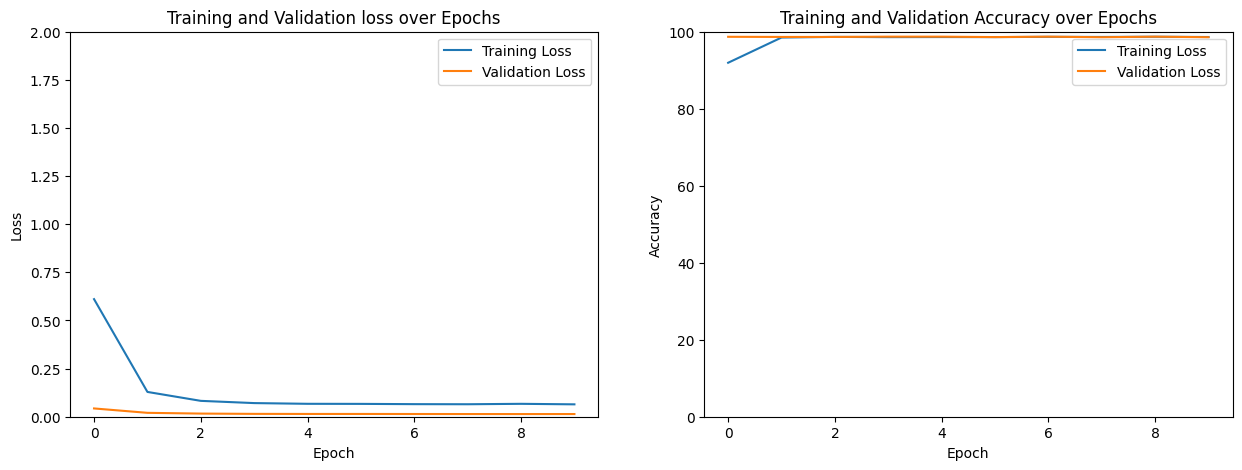

In [51]:
figure, axis = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))

axis[0].plot(total_loss_train_plot, label = 'Training Loss')
axis[0].plot(total_loss_validation_plot, label = 'Validation Loss')
axis[0].set_title('Training and Validation loss over Epochs')
axis[0].set_xlabel('Epoch')
axis[0].set_ylabel('Loss')
axis[0].set_ylim([0,2])
axis[0].legend()

axis[1].plot(total_accuracy_train_plot, label = 'Training Loss')
axis[1].plot(total_accuracy_validation_plot, label = 'Validation Loss')
axis[1].set_title('Training and Validation Accuracy over Epochs')
axis[1].set_xlabel('Epoch')
axis[1].set_ylabel('Accuracy')
axis[1].set_ylim([0,100])
axis[1].legend()

plt.show()